In [7]:
from shapely import wkt
import os
import sys
import h3
import geopandas as gpd
from shapely.geometry import Polygon
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [8]:
gdf = aup.gdf_from_db("mpos_2020", "marco")
gdf.head(2)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,01002,01,002,Asientos,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."


In [9]:
mun_dict = {"Aguascalientes":{"mpos":["01001","01005","01011"],"edo":["01"]}, 
"Mexicali":{"mpos":["02002"],"edo":["02"]},
"La Paz":{"mpos":["03003"],"edo":["03"]},
"Campeche":{"mpos":["04002"],"edo":["04"]},
"Saltillo":{"mpos":["05004", "05027", "05030"],"edo":["05"]},
"Colima":{"mpos":["06002", "06003", "06004", "06005", "06010"],"edo":["06"]},
"Tuxtla":{"mpos":["07012", "07027", "07079", "07086", "07101"],"edo":["07"]},
"Chihuahua":{"mpos":["08002", "08004", "08019"],"edo":["08"]},
"CDMX":{"mpos":["09002", "09003", "09004", "09005", "09006", "09007", "09008", "09009", "09010", "09011", "09012", "09013", "09014", "09015", "09016", "09017"],"edo":["09"]},
"ZMVM":{"mpos":["09002", "09003", "09004", "09005", "09006", "09007", "09008", "09009", "09010", "09011", "09012", "09013", "09014", "09015", "09016", "09017", "13069", "15002", "15009", "15010", "15011", "15013", "15015", "15016", "15017", "15020", "15022", "15023", "15024", "15025", "15028", "15029", "15030", "15031", "15033", "15034", "15035", "15036", "15037", "15038", "15039", "15044", "15046", "15050", "15053", "15057", "15058", "15059", "15060", "15061", "15065", "15068", "15069", "15070", "15075", "15081", "15083", "15084", "15089", "15091", "15092", "15093", "15094", "15096", "15099", "15100", "15103", "15104", "15108", "15109", "15112", "15120", "15121", "15122", "15125" ],"edo":["09", "13", "15"]},
"Durango":{"mpos":["10005"],"edo":["10"]},
"Guanajuato":{"mpos":["11015"],"edo":["11"]}, 
"Chilpancingo":{"mpos":["12029", "12075"],"edo":["12"]},
"Pachuca":{"mpos":["13022", "13039", "13048", "13051", "13052", "13082", "13083"],"edo":["13"]},
"Guadalajara":{"mpos":["14002", "14039", "14044", "14051", "14070", "14097", "14098", "14101", "14120", "14124"],"edo":["14"]},
"Toluca":{"mpos":["15005", "15018", "15027", "15051", "15054", "15055", "15062", "15067", "15072", "15073", "15076", "15087", "15090", "15106", "15115", "15118"],"edo":["15"]},
"Morelia":{"mpos":["16022", "16053", "16088"],"edo":["16"]},
"Cuernavaca":{"mpos":["17007", "17008", "17009", "17011", "17018", "17020", "17024", "17028"],"edo":["17"]},
"Tepic":{"mpos":["18008", "18017"],"edo":["18"]},
"Monterrey":{"mpos":["19001", "19006", "19009", "19010", "19012", "19018", "19019", "19021", "19025", "19026", "19031", "19039", "19041", "19045", "19046", "19047", "19048", "19049"],"edo":["19"]},
"Oaxaca":{"mpos":["20045", "20063", "20067", "20083", "20087", "20091", "20107", "20115", "20157", "20174", "20227", "20293", "20338", "20350", "20375", "20385", "20390", "20399", "20403", "20409", "20519", "20539", "20553", "20565"],"edo":["20"]},
"Puebla":{"mpos":["21001", "21015", "21034", "21041", "21048", "21060", "21074", "21090", "21106", "21114", "21119", "21122", "21125", "21132", "21136", "21140", "21143", "21163", "21181", "29015", "29017", "29019", "29023", "29025", "29027", "29028", "29029", "29032", "29041", "29044", "29051", "29053", "29054", "29056", "29057", "29058", "29059"],"edo":["21", "29"]},
"Queretaro":{"mpos":["11004", "22006", "22008", "22011", "22014"],"edo":["11", "22"]},
"Chetumal":{"mpos":["23004"],"edo":["23"]},
"SLP":{"mpos":["24028", "24035", "24055"],"edo":["24"]},
"Culiacan":{"mpos":["25006"],"edo":["25"]},
"Hermosillo":{"mpos":["26030"],"edo":["26"]},
"Villahermosa":{"mpos":["27004", "27013"],"edo":["27"]},
"Victoria":{"mpos":["28041"],"edo":["28"]},
"Tlaxcala":{"mpos":["29001", "29002", "29005", "29009", "29010", "29018", "29024", "29026", "29031", "29033", "29035", "29036", "29038", "29039", "29043", "29048", "29049", "29050", "29060"],"edo":["29"]},
"Xalapa":{"mpos":["30026", "30036", "30038", "30065", "30087", "30092", "30093", "30136", "30182"],"edo":["30"]},
"Merida":{"mpos":["31002", "31013", "31038", "31041", "31050", "31063" , "31090", "31093", "31095", "31100", "31101"],"edo":["31"]},
"Zacatecas":{"mpos":["32017", "32032", "32050", "32056", "32057"],"edo":["32"]},
"Tijuana":{"mpos":["02003", "02004", "02005"],"edo":["02"]},
"Leon":{"mpos":["11020", "11037"],"edo":["11"]},
"Laguna":{"mpos":["05009", "05017", "05035", "10007", "10012"],"edo":["05", "10"]},
"Juarez":{"mpos":["08037"],"edo":["08"]},
"Veracruz":{"mpos":["30011", "30028", "30090", "30100", "30105", "30193"],"edo":["30"]},
"Cancun":{"mpos":["23003", "23005"],"edo":["23"]},
"Tampico":{"mpos":["28003", "28009", "28038", "30123", "30133"],"edo":["28", "30"]},
"Acapulco":{"mpos":["12001", "12021"],"edo":["12"]},
"Ensenada":{"mpos":["02001"],"edo":["02"]},
"Mazatlan":{"mpos":["25012"],"edo":["25"]},
"Vallarta":{"mpos":["14067", "18020"],"edo":["14", "18"]} }

<AxesSubplot:>

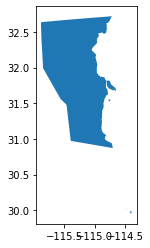

In [110]:
gdf_mun = gdf.loc[gdf.CVEGEO==mun_dict['Mexicali']['mpos'][0]]
gdf_mun.plot()

/root/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:399: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


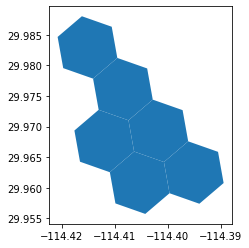

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

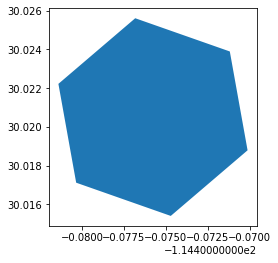

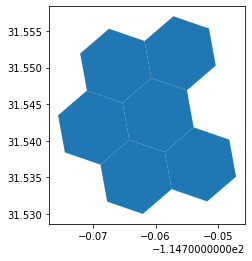

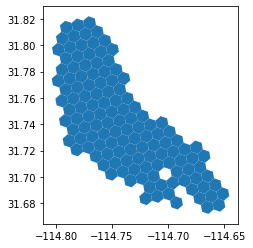

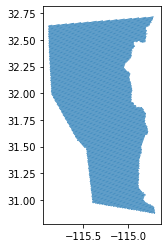

In [145]:
all_polys = gpd.GeoDataFrame()

for g in gdf_mun.geometry.__geo_interface__['features'][0]['geometry']['coordinates']:
    dict_poly = {'type':'Polygon', 'coordinates':g}
    hexs = h3.polyfill(dict_poly, 8, geo_json_conformant = True)
    polygonise = lambda hex_id: Polygon(
                                h3.h3_to_geo_boundary(
                                    hex_id, geo_json=True)
                                    )

    polys_tmp = gpd.GeoSeries(list(map(polygonise, hexs)), \
                                          index=hexs, \
                                          crs="EPSG:4326" \
                                         )
    polys_tmp.plot()

<AxesSubplot:>

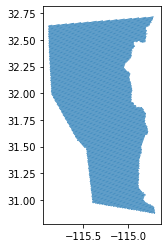

In [149]:
polys_tmp.plot()

In [127]:
hexs = h3.polyfill(dict_poly, 8, geo_json_conformant = True)
hexs

{'8848588447fffff',
 '88485b1645fffff',
 '8848588355fffff',
 '884858344dfffff',
 '8848583b07fffff',
 '8848595725fffff',
 '884858061bfffff',
 '8848580335fffff',
 '8848582b49fffff',
 '8848581401fffff',
 '884858329bfffff',
 '8848597a03fffff',
 '884859c737fffff',
 '884858af63fffff',
 '88485bbb53fffff',
 '88485d5923fffff',
 '88485c65d3fffff',
 '8848583455fffff',
 '884858958dfffff',
 '884858a8d9fffff',
 '884858ba17fffff',
 '8848588435fffff',
 '884858166bfffff',
 '88485c2ec5fffff',
 '88485b94b7fffff',
 '884859c9a7fffff',
 '8848581493fffff',
 '8848582035fffff',
 '884858015bfffff',
 '88485c6457fffff',
 '88485b976dfffff',
 '88485b8c1dfffff',
 '8848588995fffff',
 '8848594247fffff',
 '884858b437fffff',
 '8848583359fffff',
 '88485c2e1bfffff',
 '88485d4b39fffff',
 '884858ae05fffff',
 '8848594495fffff',
 '8848594e01fffff',
 '884858825bfffff',
 '884858a225fffff',
 '884858913bfffff',
 '88485820ebfffff',
 '8848588709fffff',
 '884858b05dfffff',
 '884859d0a3fffff',
 '8848594817fffff',
 '88485b8e05fffff',


In [117]:
hexs = h3.polyfill(gdf_mun.geometry.__geo_interface__['features'][0]['geometry'], 8, geo_json_conformant = True)

ValueError: Only Polygon GeoJSON supported

In [93]:


polygonise = lambda hex_id: Polygon(
                                h3.h3_to_geo_boundary(
                                    hex_id, geo_json=True)
                                    )

all_polys = gpd.GeoSeries(list(map(polygonise, hexs)), \
                                      index=hexs, \
                                      crs="EPSG:4326" \
                                     )

<AxesSubplot:>

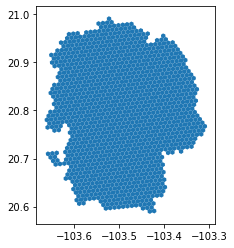

In [94]:
all_polys.plot()

/workspaces/accesibilidad-urbana/aup/utils.py:273: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = list(polygon.centroid.values[0].coords)[0]
/root/anaconda3/envs/geo_env/lib/python3.9/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

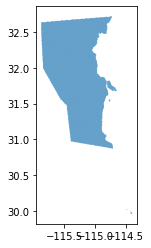

In [146]:
aup.create_hexgrid(gdf_mun, 8).plot()